# Importing libraries

In [21]:
import os
import matplotlib.pyplot as plt
from PIL import Image

In [40]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential # class of NN
from keras.layers import Convolution2D # class for adding convulution
from keras.layers import MaxPooling2D # pooling layer class
from keras.layers import Flatten # flatten layer class
from keras.layers import Dense, Dropout # other normal layers in NN
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from joblib import dump

In [23]:
os.listdir('datasets')

['test_set', 'training_set']

### Initialising the CNN

In [24]:
classifier = Sequential()

classifier.add(Convolution2D(filters = 16,
                            kernel_size = (5, 5),
                            input_shape = (512, 512, 1),
                            activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(.2))
classifier.add(Convolution2D(filters = 32,
                            kernel_size = (5, 5),
                            activation = 'relu'))

### Adding a second maxpooling layer

In [25]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(.2))

### Flattening

In [26]:
classifier.add(Flatten())

### Full connection

In [27]:
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

### Compiling the CNN

In [28]:
classifier.compile(optimizer = 'adam',
                    loss = 'binary_crossentropy',
                    metrics = ['accuracy'])

In [29]:
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 508, 508, 16)      416       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 254, 254, 16)     0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 254, 254, 16)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 250, 250, 32)      12832     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 125, 125, 32)     0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 125, 125, 32)     

In [30]:
def to_grayscale_then_rgb(image):
    # image = tf.image.rgb_to_grayscale(image)
    # image = tf.image.grayscale_to_rgb(image)
    return image

In [31]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                    preprocessing_function = to_grayscale_then_rgb)

test_datagen = ImageDataGenerator(rescale = 1/255, preprocessing_function = to_grayscale_then_rgb)

In [32]:
tr = train_datagen.flow_from_directory(
        'datasets/training_set',
        target_size = (512, 512),
        batch_size = 2,
        class_mode = 'binary',
        color_mode = 'grayscale')

tx = test_datagen.flow_from_directory(
        'datasets/test_set',
        target_size = (512, 512),
        batch_size = 2,
        class_mode = 'binary',
        color_mode = 'grayscale')

Found 200 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [33]:
tr.image_shape

(512, 512, 1)

In [34]:
tx.image_shape

(512, 512, 1)

In [35]:
history = classifier.fit(tr,
                        steps_per_epoch = 5,
                        epochs = 50,
                        validation_data = tx,
                        validation_steps = 20)

Epoch 1/50
5/5 [==============================] - 39s 6s/step - loss: 25.4816 - accuracy: 0.5000 - val_loss: 2.3526 - val_accuracy: 0.5000
Epoch 2/50
5/5 [==============================] - 15s 3s/step - loss: 2.3172 - accuracy: 0.6000 - val_loss: 1.5192 - val_accuracy: 0.4000
Epoch 3/50
5/5 [==============================] - 15s 3s/step - loss: 1.9505 - accuracy: 0.4000 - val_loss: 0.6877 - val_accuracy: 0.5500
Epoch 4/50
5/5 [==============================] - 14s 3s/step - loss: 0.6364 - accuracy: 0.7000 - val_loss: 0.6916 - val_accuracy: 0.5000
Epoch 5/50
5/5 [==============================] - 14s 3s/step - loss: 0.7821 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4500
Epoch 6/50
5/5 [==============================] - 13s 3s/step - loss: 0.7132 - accuracy: 0.5000 - val_loss: 0.6936 - val_accuracy: 0.4000
Epoch 7/50
5/5 [==============================] - 14s 3s/step - loss: 0.6996 - accuracy: 0.5000 - val_loss: 0.6930 - val_accuracy: 0.5250
Epoch 8/50
5/5 [=================

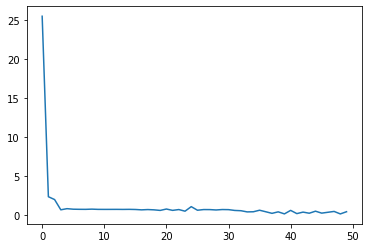

In [37]:
plt.plot(history.history['loss'])

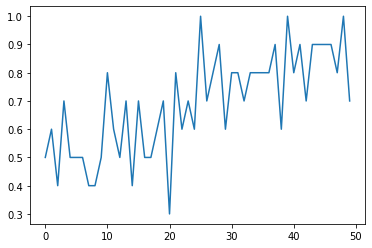

In [36]:
plt.plot(history.history['accuracy'])

In [38]:
classifier.evaluate(tx)

60/60 [==============================] - 17s 268ms/step - loss: 0.2726 - accuracy: 0.9083


[0.2726457417011261, 0.9083333611488342]

In [39]:
model_dict = {
    'title' : 'Handwritting Recognition Model',
    'classifier' : classifier
}

dump(model_dict,"hand_rec_ap.pkl")

INFO:tensorflow:Assets written to: ram://e5f8bb66-4dcc-49a4-95ed-38df2a72ddb9/assets


INFO:tensorflow:Assets written to: ram://e5f8bb66-4dcc-49a4-95ed-38df2a72ddb9/assets


['hand_rec_ap.pkl']